In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data=pd.read_csv('Suicides in India 2001-2012.csv')

In [6]:
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


## Data Cleaning

In [8]:
# rename states

data.replace('A & N Islands (Ut)', 'A & N Islands', inplace=True)
data.replace('Chandigarh (Ut)', 'Chandigarh', inplace=True)
data.replace('D & N Haveli (Ut)', 'D & N Haveli', inplace=True)
data.replace('Daman & Diu (Ut)', 'Daman & Diu', inplace=True)
data.replace('Lakshadweep (Ut)', 'Lakshadweep', inplace=True)
data.replace('Delhi (Ut)', 'Delhi', inplace=True)


In [9]:
# rename Type

data.replace('Bankruptcy or Sudden change in Economic', 
           'Bankruptcy or Sudden change in Economic Status', inplace=True)
data.replace('By Other means (please specify)', 'By Other means', inplace=True)
data.replace('Not having Children(Barrenness/Impotency',
           'Not having Children (Barrenness/Impotency', inplace=True)

In [10]:
data['State'].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Total (All India)', 'Total (States)', 'Total (Uts)', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [11]:
data = data.drop(data[(data.State == 'Total (Uts)') | (data.State == 'Total (All India)') | 
               (data.State == 'Total (States)')].index)


In [12]:
data['Type'].unique()

array(['Illness (Aids/STD)',
       'Bankruptcy or Sudden change in Economic Status',
       'Cancellation/Non-Settlement of Marriage',
       'Physical Abuse (Rape/Incest Etc.)', 'Dowry Dispute',
       'Family Problems', 'Ideological Causes/Hero Worshipping',
       'Other Prolonged Illness', 'Property Dispute',
       'Fall in Social Reputation', 'Illegitimate Pregnancy',
       'Failure in Examination', 'Insanity/Mental Illness',
       'Love Affairs', 'Professional/Career Problem', 'Divorce',
       'Drug Abuse/Addiction',
       'Not having Children (Barrenness/Impotency', 'Causes Not known',
       'Unemployment', 'Other Causes (Please Specity)', 'Poverty',
       'Death of Dear Person', 'Cancer', 'Suspected/Illicit Relation',
       'Paralysis', 'Diploma', 'No Education', 'Post Graduate and Above',
       'Middle', 'Graduate', 'Hr. Secondary/Intermediate/Pre-Universit',
       'Primary', 'Matriculate/Secondary', 'By Consuming Insecticides',
       'By Hanging', 'By Jumping from

In [13]:
data=data.drop(data[(data.Type =='By Other means')|(data.Type=='Other Causes (Please Specity)')|
                    (data.Type=='Others (Please Specify)')|(data.Type=='Causes Not known')].index)

In [14]:
data = data.drop(data[data.Total==0].index)

# EDA

In [19]:
#sns.scatterplot(x='State',y='Total')

In [20]:
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
13,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1
32,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1
47,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
54,A & N Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8
69,A & N Islands,2001,Causes,Family Problems,Female,15-29,5


### Most Sucided Cases State wise

In [25]:
top_states=data.groupby('State').count()['Total'].sort_values(ascending=False).reset_index()

In [27]:
top_states.head()

,State,Total
0,Andhra Pradesh,4586
1,Karnataka,4515
2,Tamil Nadu,4477
3,Maharashtra,4435
4,Madhya Pradesh,4429


<AxesSubplot:xlabel='State', ylabel='Total'>

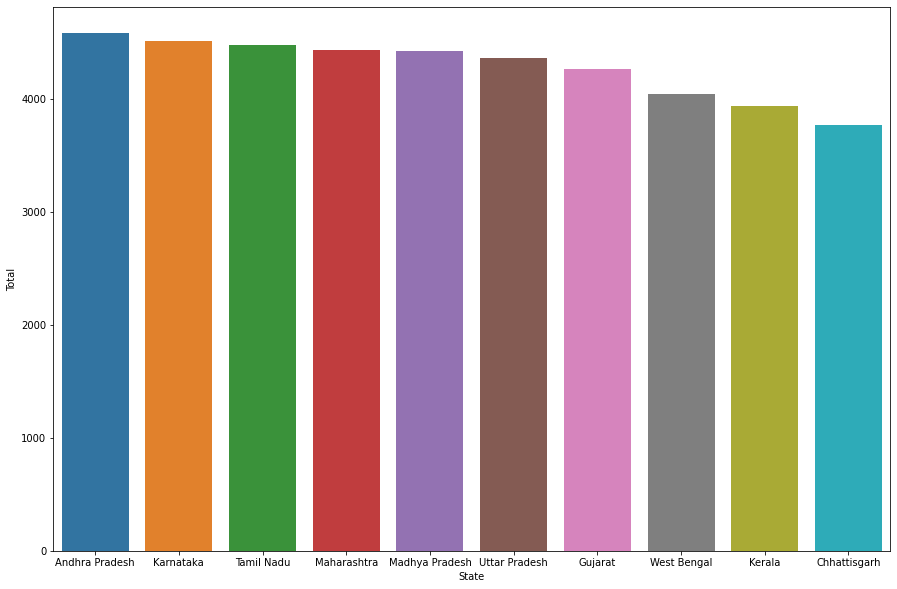

In [32]:
plt.figure(figsize=(15,10))
sns.barplot(x='State',y='Total',data=top_states.head(10))

In [37]:
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
13,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1
32,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1
47,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
54,A & N Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8
69,A & N Islands,2001,Causes,Family Problems,Female,15-29,5


In [38]:
data['Type_code'].unique()

array(['Causes', 'Education_Status', 'Means_adopted',
       'Professional_Profile', 'Social_Status'], dtype=object)

#### Female vs Male

<AxesSubplot:xlabel='Gender', ylabel='Total'>

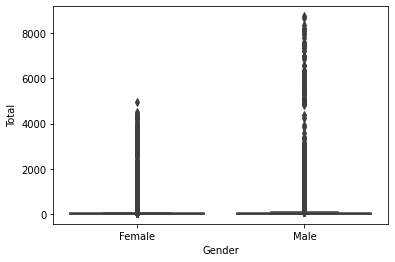

In [40]:
sns.boxplot(x='Gender',y='Total',data=data)

<AxesSubplot:xlabel='Gender'>

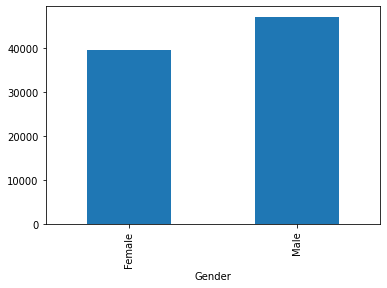

In [44]:
data.groupby('Gender').count()['Total'].plot(kind='bar')

### Sucide by Cause

In [50]:
data['Type_code'].value_counts()

Causes                  33134
Means_adopted           26709
Professional_Profile    17782
Education_Status         5602
Social_Status            3349
Name: Type_code, dtype: int64

In [54]:
data['Type'].value_counts().sort_values(ascending=False)

By Hanging                             3514
Family Problems                        3013
By Consuming Other Poison              2952
Other Prolonged Illness                2680
By Drowning                            2609
                                       ... 
Divorcee                                520
Post Graduate and Above                 507
By Machine                              504
Ideological Causes/Hero Worshipping     471
Illegitimate Pregnancy                  420
Name: Type, Length: 62, dtype: int64

In [56]:
# splitting data as per the type code

cause = data[data['Type_code'] == 'Causes']
edu_status = data[data['Type_code'] == 'Education_Status']
means_adpt = data[data['Type_code'] == 'Means_adopted']
prof = data[data['Type_code'] == 'Professional_Profile']
soc_status = data[data['Type_code'] == 'Social_Status']

In [57]:
def plot_type(data, Title, X_lab):
    p_type = data.groupby('Type').sum()['Total']
    sort_df = p_type.sort_values(ascending = False)

    fig = sort_df.plot(kind='bar', figsize = (10,6), title = Title + '\n', width = 0.75)
    fig.set_xlabel('\n' + X_lab )
    fig.set_ylabel('Count\n')
    sns.set_style('whitegrid')
    sns.set_palette('Set2')  

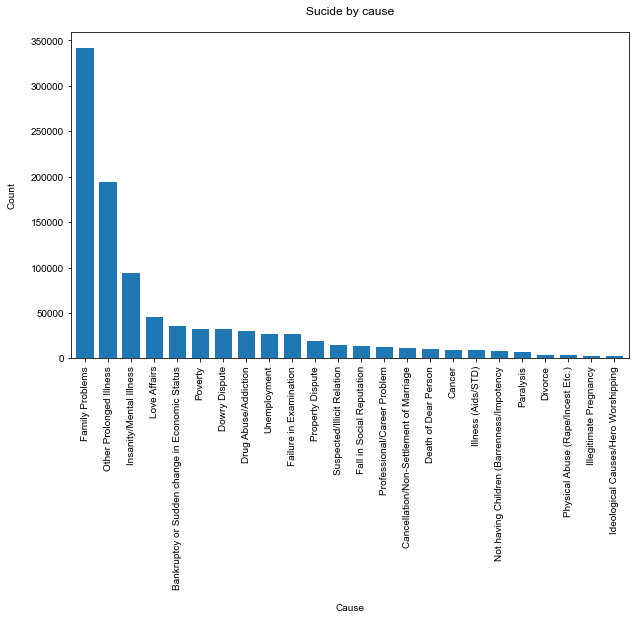

In [58]:
plot_type(cause,'Sucide by cause', 'Cause')

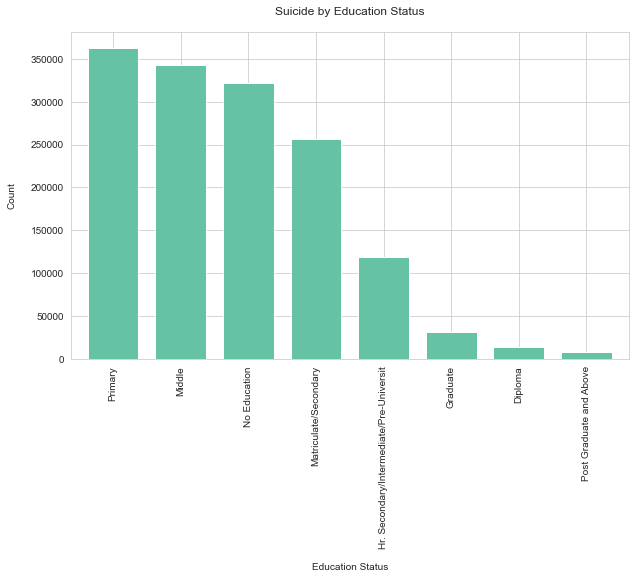

In [59]:
#plot by the educational causes
plot_type(edu_status, 'Suicide by Education Status', 'Education Status')

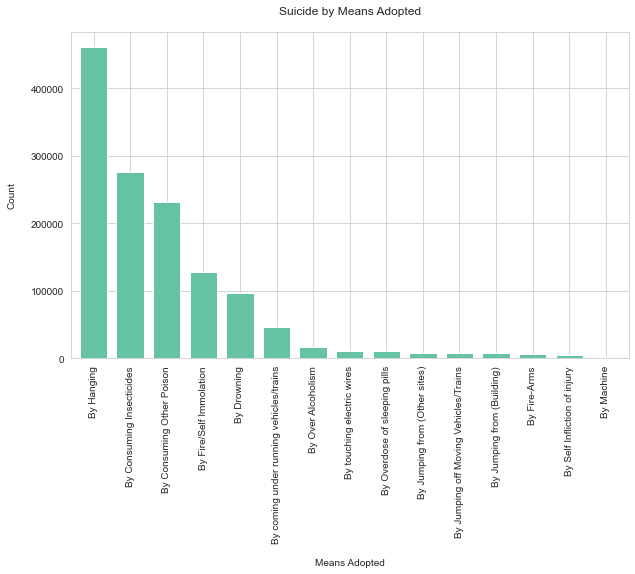

In [60]:
# plot by means adopted
plot_type(means_adpt, 'Suicide by Means Adopted', 'Means Adopted')

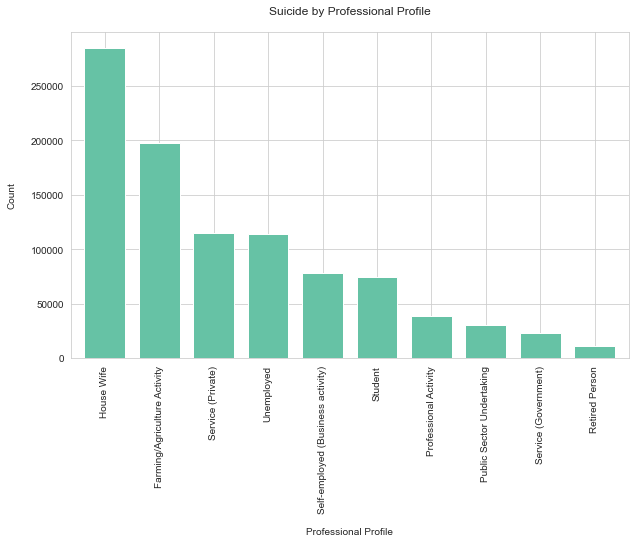

In [61]:
# suicide by professional profile
plot_type(prof, 'Suicide by Professional Profile', 'Professional Profile')

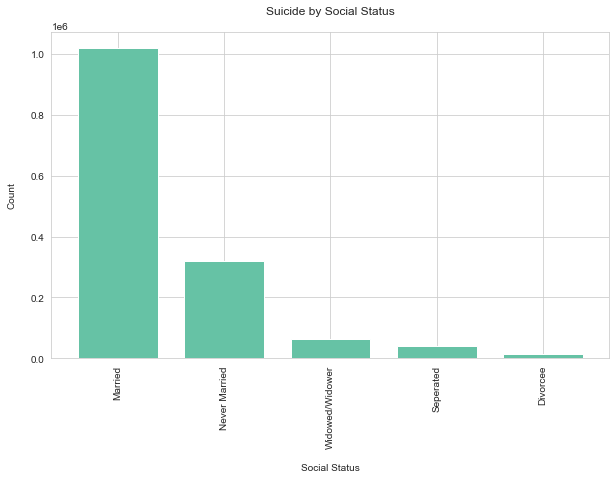

In [62]:
# suicide by social Status
plot_type(soc_status, 'Suicide by Social Status', 'Social Status')

#### Top 3 States having more suicide rates as per Age group

In [63]:
#splitting the data as per the state
State1=data[data['State']=='Karnataka']
State2=data[data['State']=='Tamil Nadu']
State3=data[data['State']=='Andhra Pradesh']

In [66]:
def plot_for_State_by_age(data):
    plt.figure(figsize=(12,6))
    data = data[['Age_group','Gender','Total']]
    edSort = data.groupby(['Age_group','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
    sns.barplot(x='Age_group',y='Total',hue='Gender',data=edSort,palette='RdBu')

In [67]:
def plot_for_State_by_type(data):
    plt.figure(figsize=(12,6))
    data = data[['Type_code','Gender','Total']]
    edSort = data.groupby(['Type_code','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
    sns.barplot(x='Type_code',y='Total',hue='Gender',data=edSort,palette='ch:2.5,-.2,dark=.3')

#### Karanataka

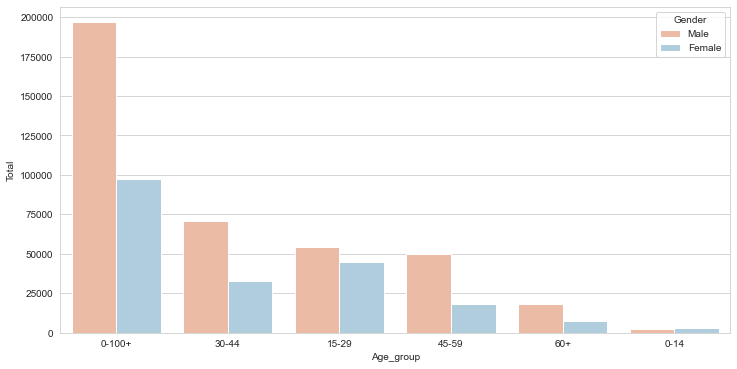

In [68]:
#plotting as per the age_group
plot_for_State_by_age(State1)

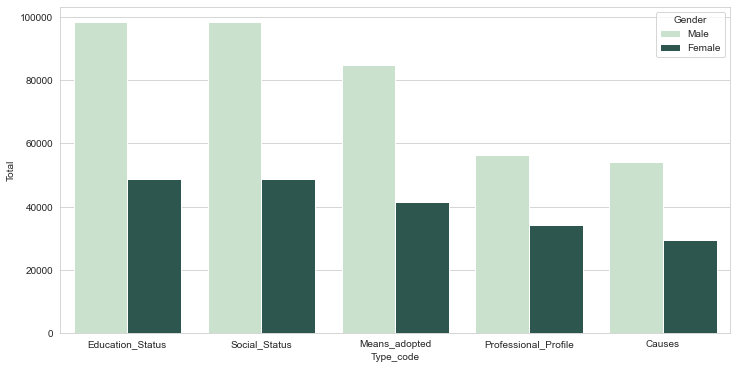

In [69]:
#plotting as per the differnet causes
plot_for_State_by_type(State1)

#### Tamil Nadu

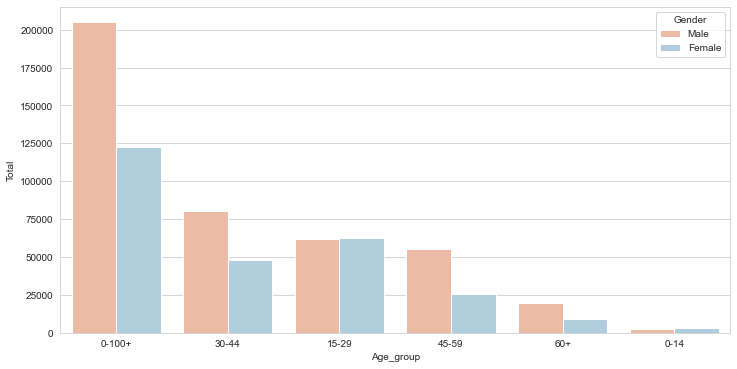

In [70]:
#plotting as per the age_group
plot_for_State_by_age(State2)

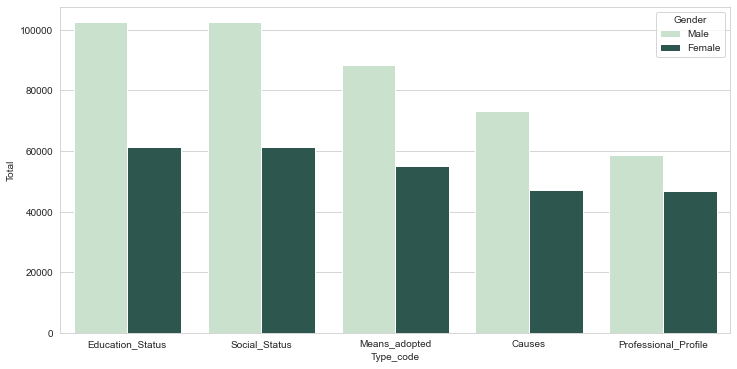

In [71]:
#plotting as per the differnet causes
plot_for_State_by_type(State2)

#### Andhra Pradesh

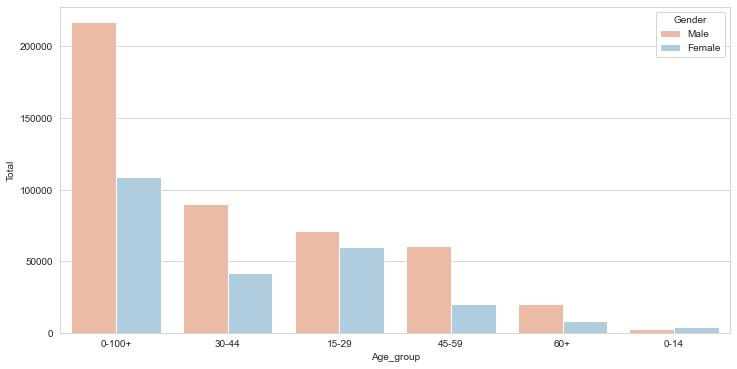

In [72]:
#plotting as per the age_group
plot_for_State_by_age(State3)

In [ ]:
#plotting as per the differnet causes
plot_for_State_by_type(State3)